In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


# Multiple Player Visualization

With the code in the single-player-analysis notebook we can visualize the data for one play of one player. Visualizing multiple players in one play is the goal with this notebook and should complete the visualization and analysis needed in the later process.

In [36]:
sample_input_csv = "/root/data/nfl-big-data-bowl-2026-prediction/train/input_2023_w01.csv"
sample_output_csv = "/root/data/nfl-big-data-bowl-2026-prediction/train/output_2023_w01.csv"

In [37]:
sample_input_df = pd.read_csv(sample_input_csv)
sample_input_df.head()

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22


In [38]:
sample_output_df = pd.read_csv(sample_output_csv)
sample_output_df.head()

,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56


Pick the first line of the input csv and use this play for the visualization.

In [39]:
if len(sample_input_df) != 0:
    sample_row = sample_input_df.iloc[0]
    game_id = sample_row['game_id']
    play_id = sample_row['play_id']
    print(f"The chosen play has the id {play_id} from the game with the id {game_id}")
else:
    raise ValueError("Input df is empty.")

The chosen play has the id 101 from the game with the id 2023090700


Filter output and input dataframes.

In [40]:
filtered_input_df = sample_input_df[(sample_input_df['game_id'] == game_id) & (sample_input_df['play_id'] == play_id)].copy()
filtered_output_df = sample_output_df[(sample_output_df['game_id'] == game_id) & (sample_output_df['play_id'] == play_id)].copy()

/tmp/ipykernel_99959/1725318471.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(players))


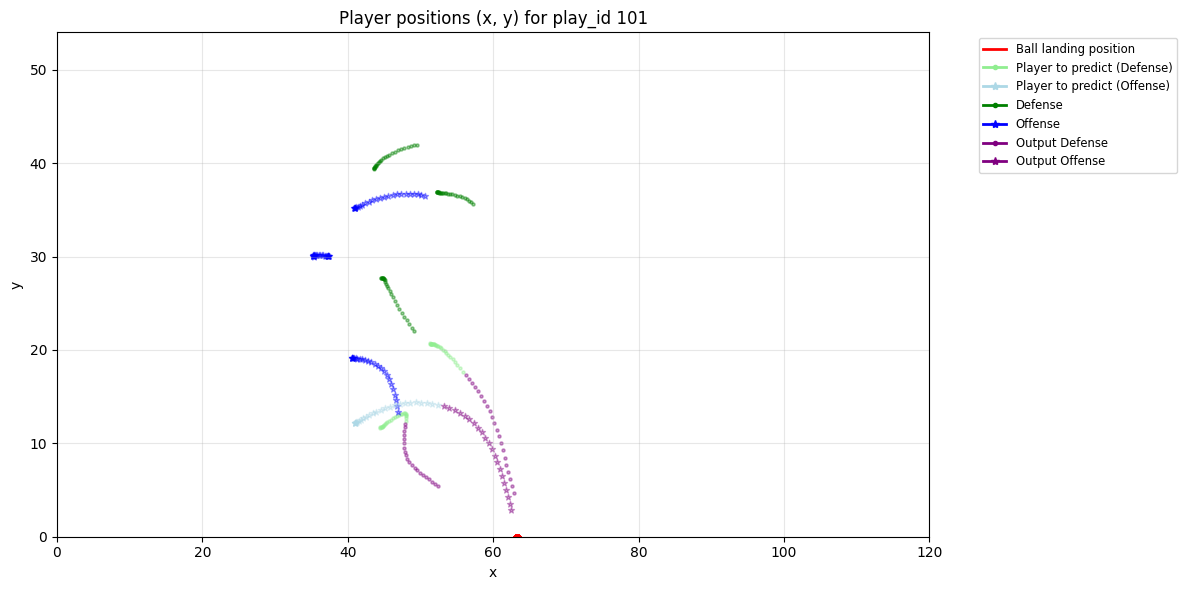

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
players = filtered_input_df['player_name'].unique()
colors = plt.cm.get_cmap('tab20', len(players))

for idx, player in enumerate(players):
    player_df = filtered_input_df[filtered_input_df['player_name'] == player]
    
    if len(player_df) != 0:
        player_info = player_df.iloc[0]
        player_predict = player_info['player_to_predict']
        player_side = player_info['player_side']
        nfl_id = player_info['nfl_id']
        play_id = player_info['play_id']
        marker = '*' if player_side == 'Offense' else '.'
        light_flag = 'light' if player_predict else ''
        if player_side == 'Offense':
            color = f'{light_flag}blue'
        else:
            color = f'{light_flag}green'
        player_df_output = filtered_output_df[(filtered_output_df['nfl_id'] == nfl_id) & (filtered_output_df['play_id'] == play_id)]
    plt.scatter(player_df['x'], player_df['y'], label=player, color=color, s=20, alpha=0.4, marker = marker)
    plt.scatter(player_df_output['x'], player_df_output['y'], label=player, color='purple', s=20, alpha=0.4, marker=marker)

plt.scatter(filtered_input_df['ball_land_x'], filtered_input_df['ball_land_y'], c='red')

plt.xlim(0, 120)
plt.ylim(0, 54)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Player positions (x, y) for play_id {}'.format(filtered_input_df['play_id'].iloc[0]))
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Ball landing position'),
    Line2D([0], [0], color='lightgreen', lw=2, label='Player to predict (Defense)', marker='.'),
    Line2D([0], [0], color='lightblue', lw=2, label='Player to predict (Offense)', marker='*'),
    Line2D([0], [0], color='green', lw=2, label='Defense', marker='.'),
    Line2D([0], [0], color='blue', lw=2, label='Offense', marker='*'),
    Line2D([0], [0], color='purple', lw=2, label='Output Defense', marker='.'),
    Line2D([0], [0], color='purple', lw=2, label='Output Offense', marker='*'),
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

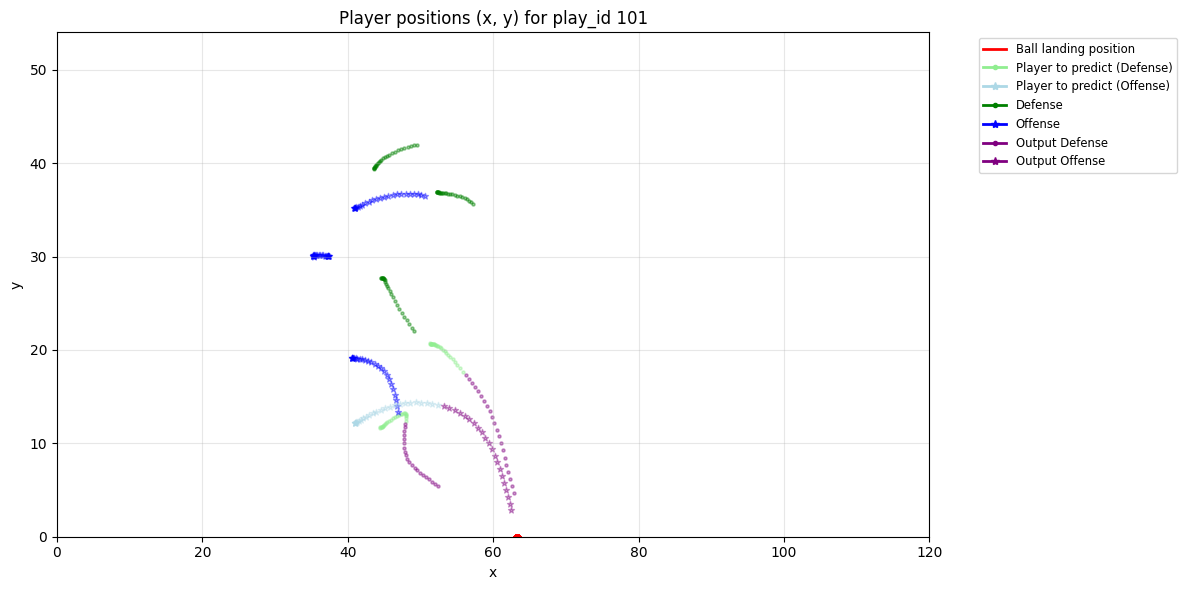

In [51]:
from visualization import plot_multiple_players

plot_multiple_players(filtered_input_df, filtered_output_df)